In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score,recall_score,f1_score

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import seaborn as sns







In [129]:
pd.set_option('display.max_columns',None)

df1=pd.read_csv("/kaggle/input/cicids2017/MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")
df2=pd.read_csv("/kaggle/input/cicids2017/MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv")
df3=pd.read_csv("/kaggle/input/cicids2017/MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Morning.pcap_ISCX.csv")
df4=pd.read_csv("/kaggle/input/cicids2017/MachineLearningCSV/MachineLearningCVE/Monday-WorkingHours.pcap_ISCX.csv")
df5=pd.read_csv("/kaggle/input/cicids2017/MachineLearningCSV/MachineLearningCVE/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv")
df6=pd.read_csv("/kaggle/input/cicids2017/MachineLearningCSV/MachineLearningCVE/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv")
df7=pd.read_csv("/kaggle/input/cicids2017/MachineLearningCSV/MachineLearningCVE/Tuesday-WorkingHours.pcap_ISCX.csv")
df8=pd.read_csv("/kaggle/input/cicids2017/MachineLearningCSV/MachineLearningCVE/Wednesday-workingHours.pcap_ISCX.csv")

In [130]:
data=pd.concat([df1,df2,df3,df4,df5,df6,df7,df8]);del df1,df2,df3,df4,df5,df6,df7,df8
data=data.dropna()
rows,columns=data.shape
data.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4.000000e+06,666666.66670,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,33,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,1.100917e+05,18348.62385,109.0,0.0,109,109,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,9174.311927,9174.311927,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,2.307692e+05,38461.53846,52.0,0.0,52,52,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,19230.769230,19230.769230,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,3.529412e+05,58823.52941,34.0,0.0,34,34,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,29411.764710,29411.764710,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,31,329,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4.000000e+06,666666.66670,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,32,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [131]:
data=data.apply(lambda x:winsorize(x.to_numpy(),limits=[0.05,0.05]))

In [132]:
data.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,2.829385e+06,2.829385e+06,2.829385e+06,2.829385e+06,2.829385e+06,2.829385e+06,2.829385e+06,2.829385e+06,2.829385e+06,2.829385e+06,2.829385e+06,2.829385e+06,2.829385e+06,2.829385e+06,2.829385e+06,2.829385e+06,2.829385e+06,2.829385e+06,2.829385e+06,2.829385e+06,2.829385e+06,2.829385e+06,2.829385e+06,2.829385e+06,2.829385e+06,2.829385e+06,2.829385e+06,2.829385e+06,2.829385e+06,2.829385e+06,2829385.0,2829385.0,2829385.0,2829385.0,2.829385e+06,2.829385e+06,2.829385e+06,2.829385e+06,2.829385e+06,2.829385e+06,2.829385e+06,2.829385e+06,2.829385e+06,2829385.0,2829385.0,2829385.0,2.829385e+06,2.829385e+06,2.829385e+06,2829385.0,2829385.0,2.829385e+06,2.829385e+06,2.829385e+06,2.829385e+06,2.829385e+06,2829385.0,2829385.0,2829385.0,2829385.0,2829385.0,2829385.0,2.829385e+06,2.829385e+06,2.829385e+06,2.829385e+06,2.829385e+06,2.829385e+06,2.829385e+06,2.829385e+06,2.829385e+06,2.829385e+06,2.829385e+06,2.829385e+06,2.829385e+06,2.829385e+06,2.829385e+06,2.829385e+06
mean,7.875868e+03,1.409066e+07,4.221930e+00,3.389598e+00,2.543020e+02,1.915013e+03,1.289571e+02,1.571495e+01,3.714619e+01,3.968300e+01,7.810219e+02,3.804562e+01,2.890875e+02,2.774289e+02,3.110436e+05,5.501495e+04,9.329658e+05,2.570732e+06,8.617893e+06,6.053383e+03,1.378553e+07,1.651556e+06,2.862572e+06,8.471860e+06,2.402841e+03,9.284360e+06,7.568655e+05,5.421416e+05,2.357313e+06,6.486164e+01,0.0,0.0,0.0,0.0,1.112725e+02,9.323803e+01,4.260103e+04,4.084793e+03,1.555242e+01,8.497090e+02,1.600416e+02,2.602046e+02,3.204808e+05,0.0,0.0,0.0,2.982136e-01,3.155322e-01,9.484040e-02,0.0,0.0,6.299479e-01,1.777616e+02,3.714619e+01,2.890875e+02,1.112725e+02,0.0,0.0,0.0,0.0,0.0,0.0,4.221930e+00,2.543020e+02,3.389598e+00,1.915013e+03,5.788146e+03,9.148153e+02,1.923747e+00,2.611311e+01,1.790648e+04,4.129631e+03,3.713392e+04,7.715872e+03,7.759604e+06,2.926387e+03,8.137518e+06,7.363409e+06
std,1.773781e+04,3.163218e+07,4.801469e+00,4.423385e+00,4.621215e+02,3.823703e+03,2.047976e+02,1.992568e+01,3.729217e+01,7.383167e+01,1.598289e+03,5.492888e+01,5.465960e+02,6.064803e+02,6.359442e+05,1.589666e+05,2.093313e+06,6.523727e+06,2.242946e+07,1.627424e+04,3.153723e+07,3.908393e+06,8.013714e+06,2.247771e+07,8.334119e+03,2.658234e+07,2.123404e+06,1.449542e+06,6.743593e+06,1.895184e+02,0.0,0.0,0.0,0.0,1.259444e+02,1.267382e+02,1.322631e+05,7.319650e+03,1.989739e+01,1.653517e+03,2.657904e+02,5.027667e+02,8.304964e+05,0.0,0.0,0.0,4.574738e-01,4.647276e-01,2.929944e-01,0.0,0.0,4.828184e-01,2.828169e+02,3.729217e+01,5.465960e+02,1.259444e+02,0.0,0.0,0.0,0.0,0.0,0.0,4.801469e+00,4.621215e+02,4.423385e+00,3.823703e+03,1.043016e+04,3.172636e+03,2.810348e+00,6.510059e+00,5.351920e+04,1.586176e+04,1.146463e+05,2.195564e+04,2.154

In [133]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2829385 entries, 0 to 692702
Data columns (total 79 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0    Destination Port             int64  
 1    Flow Duration                int64  
 2    Total Fwd Packets            int64  
 3    Total Backward Packets       int64  
 4   Total Length of Fwd Packets   int64  
 5    Total Length of Bwd Packets  int64  
 6    Fwd Packet Length Max        int64  
 7    Fwd Packet Length Min        int64  
 8    Fwd Packet Length Mean       float64
 9    Fwd Packet Length Std        float64
 10  Bwd Packet Length Max         int64  
 11   Bwd Packet Length Min        int64  
 12   Bwd Packet Length Mean       float64
 13   Bwd Packet Length Std        float64
 14  Flow Bytes/s                  float64
 15   Flow Packets/s               float64
 16   Flow IAT Mean                float64
 17   Flow IAT Std                 float64
 18   Flow IAT Max               

In [134]:
train,test=train_test_split(data,test_size=0.2,random_state=69)

train.describe()
test.describe()

train[' Label'].value_counts()
#test[' Label'].value_counts()
print(train.shape)

(2263508, 79)


In [135]:
# undersampling_strategy = {
#     'BENIGN': 25000, 
#     'DoS Hulk': 25000,
#     'PortScan': 25000,
#     'DDoS': 25000,
#     'DoS GoldenEye': 2500,  
#     'FTP-Patator': 2500,
#     'DoS slowloris': 2500,
#     'DoS Slowhttptest': 2500,
#     'Bot': 1500,
#     'Infiltration': 25,  # Retain all samples
#     'Heartbleed': 8  # Retain all samples
# }

# undersampler = RandomUnderSampler(sampling_strategy=undersampling_strategy, random_state=42)

# x_train_resampled, y_train_resampled = undersampler.fit_resample(train, train[' Label'])

# print("Class Distribution after Undersampling:")
# print(pd.Series(y_train_resampled).value_counts())
# print(x_train_resampled.shape,y_train_resampled.shape)


In [136]:
train.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,2.263508e+06,2.263508e+06,2.263508e+06,2.263508e+06,2.263508e+06,2.263508e+06,2.263508e+06,2.263508e+06,2.263508e+06,2.263508e+06,2.263508e+06,2.263508e+06,2.263508e+06,2.263508e+06,2.263508e+06,2.263508e+06,2.263508e+06,2.263508e+06,2.263508e+06,2.263508e+06,2.263508e+06,2.263508e+06,2.263508e+06,2.263508e+06,2.263508e+06,2.263508e+06,2.263508e+06,2.263508e+06,2.263508e+06,2.263508e+06,2263508.0,2263508.0,2263508.0,2263508.0,2.263508e+06,2.263508e+06,2.263508e+06,2.263508e+06,2.263508e+06,2.263508e+06,2.263508e+06,2.263508e+06,2.263508e+06,2263508.0,2263508.0,2263508.0,2.263508e+06,2.263508e+06,2.263508e+06,2263508.0,2263508.0,2.263508e+06,2.263508e+06,2.263508e+06,2.263508e+06,2.263508e+06,2263508.0,2263508.0,2263508.0,2263508.0,2263508.0,2263508.0,2.263508e+06,2.263508e+06,2.263508e+06,2.263508e+06,2.263508e+06,2.263508e+06,2.263508e+06,2.263508e+06,2.263508e+06,2.263508e+06,2.263508e+06,2.263508e+06,2.263508e+06,2.263508e+06,2.263508e+06,2.263508e+06
mean,7.878999e+03,1.409173e+07,4.222523e+00,3.390456e+00,2.544465e+02,1.915209e+03,1.289999e+02,1.570311e+01,3.714852e+01,3.970974e+01,7.809105e+02,3.801152e+01,2.890397e+02,2.774371e+02,3.107580e+05,5.496245e+04,9.323269e+05,2.568409e+06,8.613290e+06,6.053279e+03,1.378673e+07,1.650731e+06,2.860655e+06,8.467186e+06,2.404530e+03,9.281905e+06,7.560579e+05,5.420581e+05,2.354559e+06,6.483249e+01,0.0,0.0,0.0,0.0,1.112947e+02,9.325621e+01,4.255492e+04,4.087088e+03,1.554137e+01,8.496744e+02,1.600079e+02,2.601916e+02,3.203950e+05,0.0,0.0,0.0,2.984452e-01,3.155566e-01,9.488369e-02,0.0,0.0,6.299099e-01,1.777215e+02,3.714852e+01,2.890397e+02,1.112947e+02,0.0,0.0,0.0,0.0,0.0,0.0,4.222523e+00,2.544465e+02,3.390456e+00,1.915209e+03,5.792720e+03,9.172268e+02,1.923712e+00,2.611507e+01,1.791877e+04,4.133542e+03,3.715100e+04,7.718619e+03,7.753066e+06,2.928774e+03,8.131248e+06,7.356101e+06
std,1.774057e+04,3.163721e+07,4.802550e+00,4.424318e+00,4.624191e+02,3.823506e+03,2.048909e+02,1.992024e+01,3.730561e+01,7.386968e+01,1.598023e+03,5.490118e+01,5.465045e+02,6.064030e+02,6.355429e+05,1.588737e+05,2.092388e+06,6.520303e+06,2.242339e+07,1.627450e+04,3.154210e+07,3.907191e+06,8.010354e+06,2.247135e+07,8.336615e+03,2.658235e+07,2.121982e+06,1.449479e+06,6.738092e+06,1.894537e+02,0.0,0.0,0.0,0.0,1.259798e+02,1.267617e+02,1.321760e+05,7.322713e+03,1.989206e+01,1.653347e+03,2.657308e+02,5.026882e+02,8.303045e+05,0.0,0.0,0.0,4.575759e-01,4.647373e-01,2.930543e-01,0.0,0.0,4.828287e-01,2.827521e+02,3.730561e+01,5.465045e+02,1.259798e+02,0.0,0.0,0.0,0.0,0.0,0.0,4.802550e+00,4.624191e+02,4.424318e+00,3.823506e+03,1.043371e+04,3.176505e+03,2.811089e+00,6.509649e+00,5.354421e+04,1.586786e+04,1.146701e+05,2.196330e+04,2.153

In [137]:
test.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,565877.000000,5.658770e+05,565877.000000,565877.000000,565877.000000,565877.000000,565877.000000,565877.000000,565877.000000,565877.000000,565877.000000,565877.000000,565877.000000,565877.000000,5.658770e+05,565877.000000,5.658770e+05,5.658770e+05,5.658770e+05,565877.000000,5.658770e+05,5.658770e+05,5.658770e+05,5.658770e+05,565877.000000,5.658770e+05,5.658770e+05,5.658770e+05,5.658770e+05,565877.000000,565877.0,565877.0,565877.0,565877.0,565877.000000,565877.000000,565877.000000,565877.000000,565877.000000,565877.000000,565877.000000,565877.000000,5.658770e+05,565877.0,565877.0,565877.0,565877.000000,565877.000000,565877.000000,565877.0,565877.0,565877.000000,565877.000000,565877.000000,565877.000000,565877.000000,565877.0,565877.0,565877.0,565877.0,565877.0,565877.0,565877.000000,565877.000000,565877.000000,565877.000000,565877.000000,565877.000000,565877.000000,565877.000000,565877.000000,565877.000000,565877.000000,565877.000000,5.658770e+05,565877.000000,5.658770e+05,5.658770e+05
mean,7863.346331,1.408636e+07,4.219557,3.386167,253.724177,1914.231029,128.785635,15.762307,37.136876,39.576020,781.467685,38.182020,289.278893,277.396492,3.121859e+05,55224.943294,9.355217e+05,2.580022e+06,8.636303e+06,6053.796023,1.378071e+07,1.654859e+06,2.870237e+06,8.490556e+06,2396.081095,9.294178e+06,7.600959e+05,5.424757e+05,2.368328e+06,64.978237,0.0,0.0,0.0,0.0,111.183436,93.165313,42785.437340,4075.612492,15.596589,849.847566,160.176755,260.256682,3.208238e+05,0.0,0.0,0.0,0.297287,0.315434,0.094667,0.0,0.0,0.630100,177.921797,37.136876,289.278893,111.183436,0.0,0.0,0.0,0.0,0.0,0.0,4.219557,253.724177,3.386167,1914.231029,5769.847916,905.169249,1.923888,26.105237,17857.336953,4113.989224,37065.595175,7704.882881,7.785757e+06,2916.841027,8.162596e+06,7.392640e+06
std,17726.775672,3.161207e+07,4.797145,4.419656,460.929322,3824.494914,204.424193,19.947379,37.238413,73.679404,1599.352563,55.039394,546.962065,606.789728,6.375461e+05,159337.321170,2.097008e+06,6.537401e+06,2.245372e+07,16273.229657,3.151780e+07,3.913199e+06,8.027143e+06,2.250313e+07,8324.128864,2.658232e+07,2.129082e+06,1.449798e+06,6.765549e+06,189.777075,0.0,0.0,0.0,0.0,125.802583,126.644456,132610.974422,7307.387909,19.918617,1654.198736,266.028884,503.081214,8.312642e+05,0.0,0.0,0.0,0.457064,0.464689,0.292755,0.0,0.0,0.482778,283.076124,37.238413,546.962065,125.802583,0.0,0.0,0.0,0.0,0.0,0.0,4.797145,460.929322,4.419656,3824.494914,10415.929517,3157.096129,2.807383,6.511702,53419.097133,15837.373896,114550.885492,21924.988998,2.158002e+07,11254.893332,2.237291e+07,2.128221e+07
min,53.000000,4.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

In [138]:
standard=StandardScaler()

number_columns=train.select_dtypes(['float64','int64']).columns
x_train=standard.fit_transform(train.select_dtypes(['float64','int64']))
x_test=standard.transform(test.select_dtypes(['float64','int64']))

x_train=pd.DataFrame(x_train,columns=number_columns)
x_test=pd.DataFrame(x_test,columns=number_columns)




In [139]:
undersampling_strategy = {
    'BENIGN': 25000, 
    'DoS Hulk': 25000,
    'PortScan': 25000,
    'DDoS': 25000,
    'DoS GoldenEye': 2500,  
    'FTP-Patator': 2500,
    'DoS slowloris': 2500,
    'DoS Slowhttptest': 2500,
    'Bot': 1500,
    'Infiltration': 25,  # Retain all samples
    'Heartbleed': 8  # Retain all samples
}

undersampler = RandomUnderSampler(sampling_strategy=undersampling_strategy, random_state=42)

x_train_resampled, y_train_resampled = undersampler.fit_resample(x_train, train[' Label'])

print("Class Distribution after Undersampling:")
print(pd.Series(y_train_resampled).value_counts())
print(x_train_resampled.shape,y_train_resampled.shape)

Class Distribution after Undersampling:
 Label
BENIGN              25000
DDoS                25000
DoS Hulk            25000
PortScan            25000
DoS GoldenEye        2500
DoS Slowhttptest     2500
DoS slowloris        2500
FTP-Patator          2500
Bot                  1500
Infiltration           25
Heartbleed              8
Name: count, dtype: int64
(111533, 78) (111533,)


In [163]:
encoder = OneHotEncoder()

print(train[' Label'].shape)
y_train = train[' Label'].values.reshape(-1,1)
y_train = encoder.fit_transform(y_train)
y_train = y_train.toarray()
print(y_train.shape)

cnt = np.sum(y_train,axis = 0)
for i,counts in enumerate(cnt):
    print(f"Category {i} : {counts} samples")

y_test = test[' Label'].values.reshape(-1,1)
y_test = encoder.transform(y_test)
y_test = y_test.toarray()
print(y_test)


y_train_resampled_reshaped = y_train_resampled.values.reshape(-1, 1)
y_train_encoded = encoder.transform(y_train_resampled_reshaped)
y_train_encoded_array = y_train_encoded.toarray()

print(y_train_encoded_array)

cnti = np.sum(y_test,axis = 0)
for i,counts in enumerate(cnti):
    print(f"Category {i} : {counts} samples")


category_counts = np.sum(y_train_encoded_array, axis=0)
for i, count in enumerate(category_counts):
    print(f"Category {i}: {count} samples")
    
y_train_resampled_index = np.argmax(y_train_encoded_array, axis=1)
y_train_index = np.argmax(y_train, axis=1)
y_test_index = np.argmax(y_test, axis=1)


(2263508,)
(2263508, 11)
Category 0 : 1818408.0 samples
Category 1 : 1554.0 samples
Category 2 : 102136.0 samples
Category 3 : 8167.0 samples
Category 4 : 184145.0 samples
Category 5 : 4392.0 samples
Category 6 : 4651.0 samples
Category 7 : 6396.0 samples
Category 8 : 8.0 samples
Category 9 : 25.0 samples
Category 10 : 133626.0 samples
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]
Category 0 : 454280.0 samples
Category 1 : 412.0 samples
Category 2 : 25891.0 samples
Category 3 : 2126.0 samples
Category 4 : 45979.0 samples
Category 5 : 1107.0 samples
Category 6 : 1145.0 samples
Category 7 : 1542.0 samples
Category 8 : 3.0 samples
Category 9 : 11.0 samples
Category 10 : 33381.0 samples
Category 0: 25000.0 samples
Category 1: 15

In [141]:
# random_forest=RandomForestClassifier()

# random_forest.fit(x_train,y_train)

In [142]:
# importance=random_forest.feature_importances_
# parameter_imp=pd.DataFrame({"Features":x_train.columns,"Importance":importance})

# plt.rcParams['figure.figsize']=(15,5)
# parameter_imp.plot.bar(x='Features',y='Importance')
# plt.show()

In [143]:
# print("No of trees used:",random_forest.n_estimators)
# print("Criterion used:",random_forest.criterion)

In [144]:
# predicted=random_forest.predict(x_test)

In [145]:
# accuracy=np.where((predicted==y_test))[0].size
# accuracy/=predicted.size
# accuracy

In [146]:
# neural_network = MLPClassifier(hidden_layer_sizes=(10,), max_iter=100)
# neural_network.fit(x_train, y_train)


In [147]:
# predicted_nn = neural_network.predict(x_test)
# accuracy_nn = np.where(predicted_nn == y_test)[0].size / predicted_nn.size
# print(accuracy_nn)

In [148]:
# precision = precision_score(y_test, predicted_nn, average='weighted')
# recall = recall_score(y_test, predicted_nn, average='weighted')
# f1 = f1_score(y_test, predicted_nn, average='weighted')

# print("Precision:", precision)
# print("Recall:", recall)
# print("F1-score:", f1)



In [149]:

# nb_classifier = MultinomialNB()


# nb_classifier.fit(x_train_resampled, y_train_resampled)


# predicted_labels = nb_classifier.predict(x_test)

# report = classification_report(y_test, predicted_labels)
# print("Classification Report:")
# print(report)


In [150]:

# nb_classifier2 = MultinomialNB()

# nb_classifier2.fit(x_train,y_train)

# prediction = nb_classifier2.predit(x_test)
# report = classification_report(y_test, prediction)

# print("Report: ")
# print(report)


In [187]:

pca = PCA(n_components=5)  

x_train_pca = pca.fit_transform(x_train)

x_test_pca = pca.transform(x_test)
x_train_resampled_pca = pca.fit_transform(x_train_resampled)

In [188]:

qda_classifier = QuadraticDiscriminantAnalysis()
qda_classifier.fit(x_train_pca, y_train_index)

qda_classifier_resampled = QuadraticDiscriminantAnalysis()
qda_classifier_resampled.fit(x_train_resampled_pca, y_train_resampled_index)



QuadraticDiscriminantAnalysis()

Metrics for imbalanced data (QDA): 
Precision: 0.9215373906852803
Recall: 0.862991427465686
F1-score: 0.882105146608342


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Metrics for balanced data (QDA): 
Precision: 0.7110150576177197
Recall: 0.5746990953864533
F1-score: 0.6337968501204103


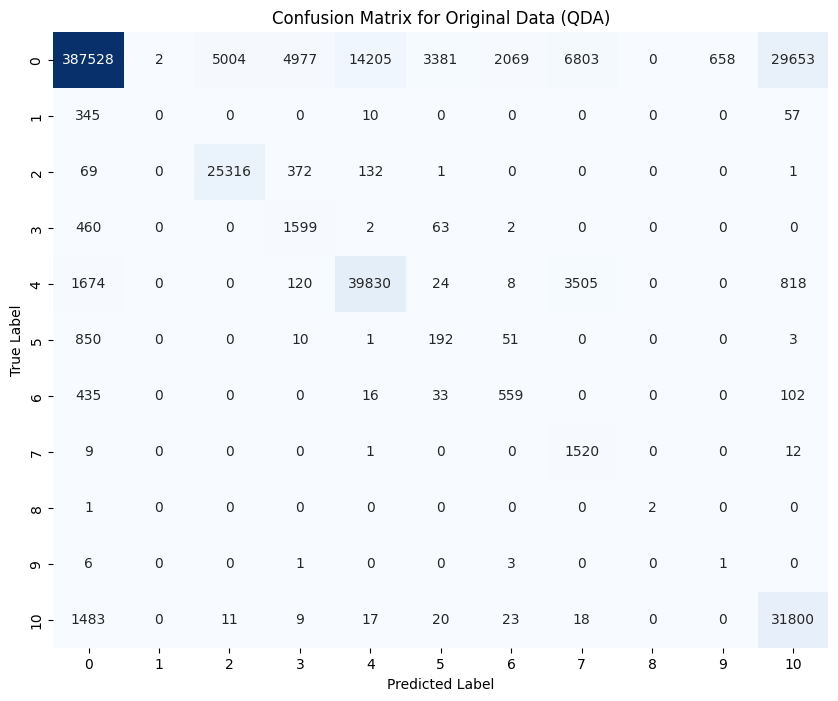

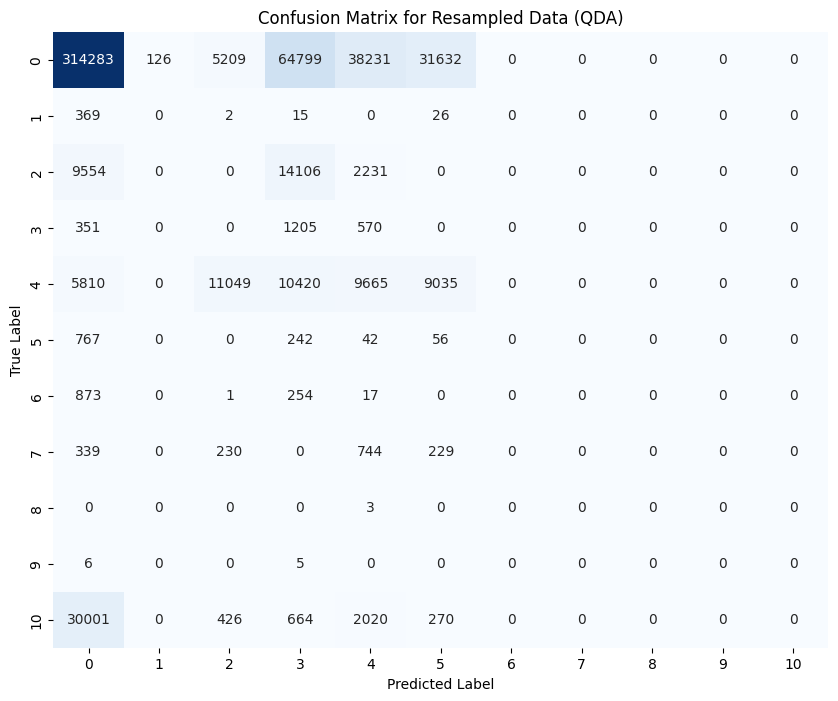

In [178]:

predictions_qda = qda_classifier.predict(x_test_pca)

predictions_qda_resampled = qda_classifier_resampled.predict(x_test_pca)

conf_matrix_qda = confusion_matrix(y_test_index, predictions_qda)

conf_matrix_qda_resampled = confusion_matrix(y_test_index, predictions_qda_resampled)

precision_qda = precision_score(y_test_index, predictions_qda, average='weighted')
recall_qda = recall_score(y_test_index, predictions_qda, average='weighted')
f1_qda = f1_score(y_test_index, predictions_qda, average='weighted')

print("Metrics for imbalanced data (QDA): ")
print("Precision:", precision_qda)
print("Recall:", recall_qda)
print("F1-score:", f1_qda)

# Metrics for resampled data
precision_qda_resampled = precision_score(y_test_index, predictions_qda_resampled, average='weighted')
recall_qda_resampled = recall_score(y_test_index, predictions_qda_resampled, average='weighted')
f1_qda_resampled = f1_score(y_test_index, predictions_qda_resampled, average='weighted')

print("Metrics for balanced data (QDA): ")
print("Precision:", precision_qda_resampled)
print("Recall:", recall_qda_resampled)
print("F1-score:", f1_qda_resampled)

# Plot confusion matrix for the original data
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_qda, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Original Data (QDA)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot confusion matrix for the resampled data
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_qda_resampled, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Resampled Data (QDA)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [152]:
# # Initialize the QDA classifier
# qda_classifier = QuadraticDiscriminantAnalysis()

# # Fit the QDA classifier to the training data
# qda_classifier.fit(x_train_resampled,y_train_resampled)

# # Make predictions on the test data
# predictions = qda_classifier.predict(x_test)

# # Evaluate the performance of the classifier
# report = classification_report(y_test, predictions)
# print(report)

In [153]:

logreg_classifier = LogisticRegression(multi_class='multinomial', solver='sag' )
logreg_classifier.fit(x_train, y_train_index)

logreg_classifier2 = LogisticRegression(multi_class='multinomial', solver='sag' )
logreg_classifier2.fit(x_train_resampled, y_train_resampled_index)


In [154]:

predictions = logreg_classifier.predict(x_test)
predictions_resampled = logreg_classifier2(x_test)

precision = precision_score(y_test, predictions, average='weighted')
recall = recall_score(y_test, predictions, average='weighted')
f1 = f1_score(y_test, predictions, average='weighted')

print("Metrics for imbalanced data: ")
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

conf_matrix_lgrg = confusion_matrix(y_test, predictions)
print(conf_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_lgrg, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Resampled Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

precision = precision_score(y_test, predictions_resampled, average='weighted')
recall = recall_score(y_test, predictions_resampled, average='weighted')
f1 = f1_score(y_test, predictions_resampled, average='weighted')
print("Metrics for balanced data: ")
print("Precision:",precision)
print("Recall:", recall)
print("F1-score: ", f1)

conf_matrix_resampled = confusion_matrix(y_test_index,predictions)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_resampled, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Resampled Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()



In [156]:


print(y_train_index.shape)
svm_classifier = LinearSVC()
svm_classifier.fit(x_train, y_train_index)


svm_classifier2 = LinearSVC()
svm_classifier2.fit(x_train_resampled,y_train_resampled_index)

(2263508,)


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

Confusion Matrix:


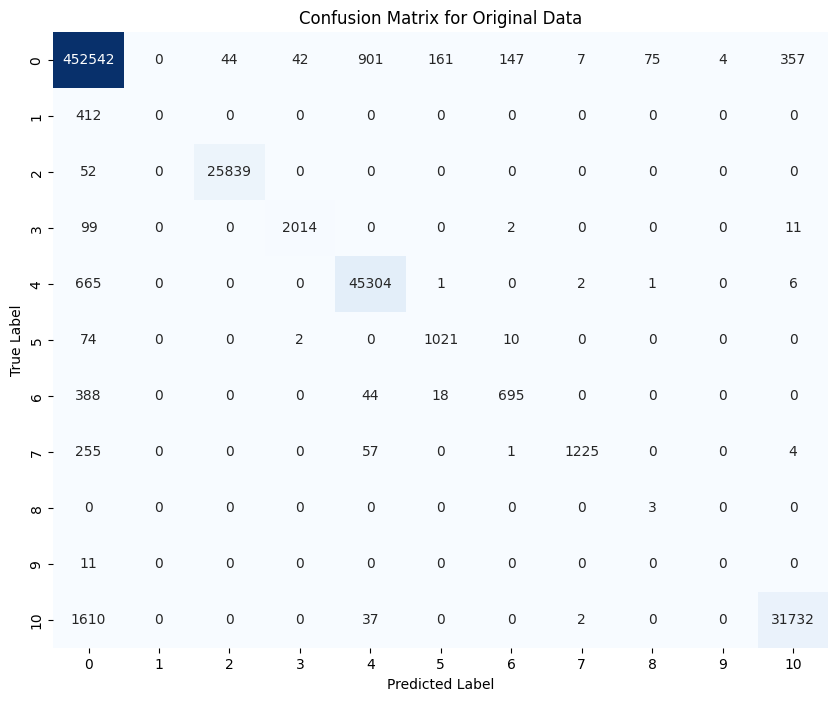

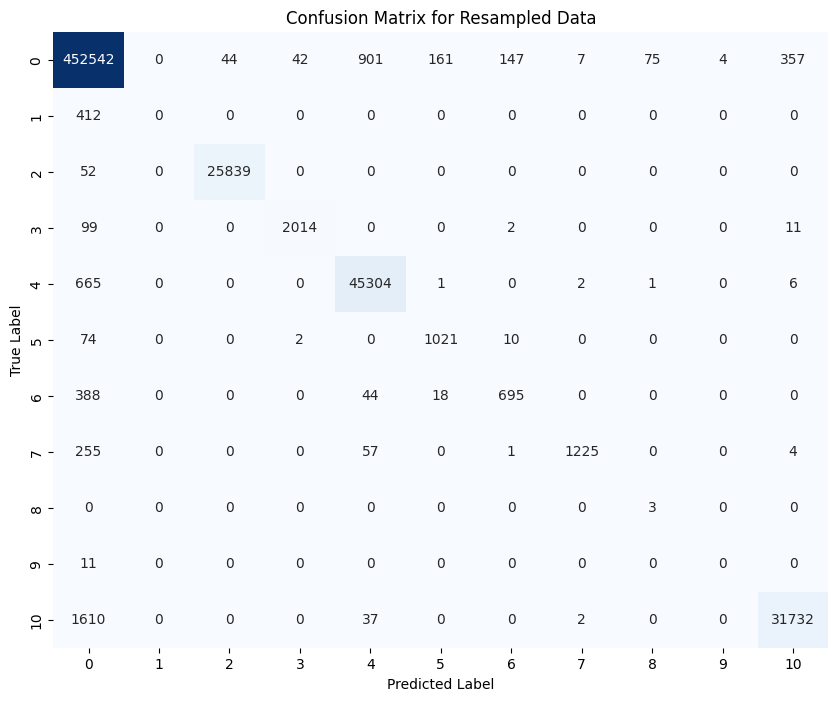

In [162]:


predictions = svm_classifier.predict(x_test)
predictions_resampled = svm_classifier2.predict(x_test)

conf_matrix = confusion_matrix(y_test_index, predictions)
conf_matrix_resampled = confusion_matrix(y_test_index,predictions)

precision = precision_score(y_test, predictions, average='weighted')
recall = recall_score(y_test, predictions, average='weighted')
f1 = f1_score(y_test, predictions, average='weighted')

print("Metrics for imbalanced data: ")
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

precision = precision_score(y_test, predictions_resampled, average='weighted')
recall = recall_score(y_test, predictions_resampled, average='weighted')
f1 = f1_score(y_test, predictions_resampled, average='weighted')

print("Metrics for balanced data: ")
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

print("Confusion Matrix:")
# Plot confusion matrix for the original data
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Original Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_resampled, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Resampled Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
